В1. Создать график функции sinc в декартовой системе координат на плоскости. Функция , где .

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

x, y = np.linspace(-10,10,400), np.linspace(-10,10,400)
X, Y = np.meshgrid(x, y)

f = np.sinc(np.hypot(X, Y))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, f, rstride=5, cstride=5, cmap=cm.summer)
plt.show()

В2. Данные в файле с разделенными запятыми значениями birthday-data.csv, сообщают околичестве новорожденных, зарегистрированных Национальным центром медицинской статистики из системы Центров по контролю и профилактике заболеваний США за каждый день года как общий итог за период 1969–1988 гг. Столбцы обозначают номер месяца (1 = январь, 12 = декабрь), номер дня и количество живорожденных.
Использовать NumPy для вычисления оценки по каждому дню года вероятности дня рождения конкретного человека в этот день. Создать график вероятностей в виде тепловой карты, как в примере5, и исследовать все его свойства, заслуживающие внимания.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Read in the relevant data from our input file
dt = np.dtype([('month', np.int), ('day', np.int), ('n', np.float)])
data = np.genfromtxt('birthday-data.csv',dtype=dt, delimiter=',', skip_header=1)

total = np.sum(data['n'])

# In our heatmap, nan will mean "no such date", e.g. 31 June
heatmap = np.empty((12, 31))
heatmap[:] = np.nan

# Maximum number of days per month
mdpm = np.array([31,29,31,30,31,30,31,31,30,31,30,31])
for month, day, n in data:
    # NumPy arrays are zero-indexed; days and months are not!
    imonth, iday = month-1, day-1
    if day > mdpm[imonth]:
        continue
    heatmap[imonth, iday] = n / total
heatmap[1,28] *= 4

# Plot the heatmap, customize and label the ticks
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(heatmap, interpolation='nearest')
ax.set_yticks(range(12))
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
days = np.array(range(0, 31, 2))
ax.set_xticks(days)
ax.set_xticklabels(['{:d}'.format(day+1) for day in days])
ax.set_xlabel('Day of month')

# Add a colour bar along the bottom and label it
cbar = fig.colorbar(ax=ax, mappable=im, orientation='horizontal')
cbar.set_label('Birthday Probability')

plt.show()

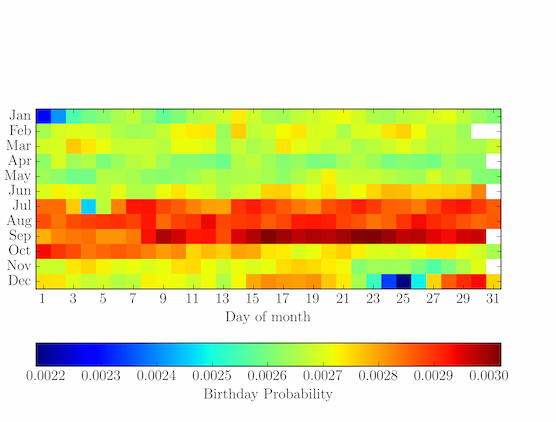